In [ ]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [112]:

wiki_api = "https://en.wikipedia.org/w/api.php"
def get_content(article_name):
    parameters = { "action": "parse", 
                  "page": article_name,
                  "format": "json",
                  "prop": "text",
                  "formatversion": 2
                  }
                  
    response = requests.get(wiki_api, params=parameters).json()
    return response

In [113]:
def merge_contents(data):
    data = data['parse']['text'].lower()
    soup = BeautifulSoup(data, 'html.parser')
    raw_text = soup.get_text()
    raw_list = raw_text.split()
    
    return raw_list


In [114]:
def remove_stop_words(content, stop_words):
    filtered_stop_list = []
    for string in content:
        if string not in stop_words:
            filtered_stop_list.append(string)
    return filtered_stop_list

In [115]:
def tokenize(content):
    cleaned_list = []

    for index, string in enumerate(content):
        content[index] = string.replace("'", "")
        if content[index].isalpha():
            cleaned_list.append(string)
    
    for index, string in enumerate(cleaned_list):
        cleaned_list[index] = re.sub(r'\.+', '', string)

    return cleaned_list

In [116]:
def count_frequency(collection):
    word_count = defaultdict(int)

    for word in collection:
        word_count[word] += 1

    return word_count
    

In [117]:
def print_most_frequent(frequencies, n):
    #convert to list to slice and iterate up to n (finding the top most used words)
    sorted_words = sorted(frequencies.items(), key=lambda item: item[1], reverse=True)

    return sorted_words[:n]

In [118]:
def visualize_data(sorted_data):
 
    df = pd.DataFrame(sorted_data, columns=['word', 'frequency'])
    df = df.sort_values('frequency', ascending=True)
    df.plot(kind='barh', x='word', legend=False)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title('Most common tokens in ozone article')
    plt.show()

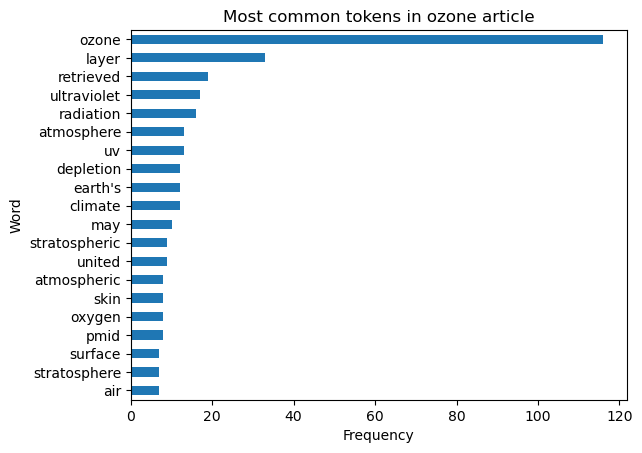

In [119]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "dont", "should", "now"]
# retreiving wikipedia article convert to json object
data = get_content("Ozone_layer")
# cleaning json and converting to raw list 
merge_content = merge_contents(data)
# cleaning raw list (getting rid of non-alphanumeric , wikipedia math symbols and special chars)
collection = tokenize(merge_content)
# removing all stop words from cleaned list 
filtered_collection = remove_stop_words(collection, stop_words)
# finding frequencies of each word 
frequencies = count_frequency(filtered_collection)
# sorting word frequencies, allowing for up to n number of words 
cleaned_sorted_data = print_most_frequent(frequencies, 20)
# plotting cleaned most frequent words
visualize_data(cleaned_sorted_data)

TODO : 
1. get rid of math html text in data output [X]
2. seperate words from words in paranthesis example = examp[word] ->> 'examp', 'word' [X]
3. extract only plain text from list [X]
4. count frequency of each word
5. find top n number of words [X]
6. vizualize output of top words used []
7. parse filler words ..(the, of, this, that etc..) []
